In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



Run the first cell to initial the notebook. Edit the directory path in the next cell. The third last cell is for sorting and saving `csv` files for origin. The second last and last cell are for SS calculation. 

In [7]:
directory_path ="C:\\Users\\sophi\\Box\\MoS2Project\\2025-11-18-10mVExamples"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [21]:
filename = file_list[2]

df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.50,0.1,8.757000e-11,-2.768900e-10,1.538000e-09
1,-1.49,0.1,1.200700e-10,-2.705200e-10,1.475300e-09
2,-1.48,0.1,1.251600e-10,-2.715500e-10,1.428300e-09
3,-1.47,0.1,1.364800e-10,-2.754300e-10,1.480500e-09
4,-1.46,0.1,9.475000e-11,-2.511400e-10,1.509000e-09


In [22]:
df[' forward'] = True

df.loc[(df.index >= 301) & (df.index <= 601), ' forward'] = False
df.loc[(df.index >= 903) & (df.index <= 1203), ' forward'] = False
df.loc[(df.index >= 1505) & (df.index <= 1805), ' forward'] = False
df.loc[(df.index >= 2107) & (df.index <= 2407), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

       VTG   VD            ID           ITG           Ibg  forward
0    -1.50  0.1  8.757000e-11 -2.768900e-10  1.538000e-09     True
1    -1.49  0.1  1.200700e-10 -2.705200e-10  1.475300e-09     True
2    -1.48  0.1  1.251600e-10 -2.715500e-10  1.428300e-09     True
3    -1.47  0.1  1.364800e-10 -2.754300e-10  1.480500e-09     True
4    -1.46  0.1  9.475000e-11 -2.511400e-10  1.509000e-09     True
5    -1.45  0.1  1.284400e-10 -2.634600e-10  1.511900e-09     True
6    -1.44  0.1  1.296600e-10 -2.670800e-10  1.568000e-09     True
7    -1.43  0.1  1.353100e-10 -2.599300e-10  1.471600e-09     True
8    -1.42  0.1  1.176300e-10 -2.579100e-10  1.487400e-09     True
9    -1.41  0.1  1.259400e-10 -2.619100e-10  1.514000e-09     True
10   -1.40  0.1  1.190700e-10 -2.267400e-10  1.486500e-09     True
11   -1.39  0.1  1.106000e-10 -2.442300e-10  1.479500e-09     True
12   -1.38  0.1  1.284100e-10 -2.463700e-10  1.495500e-09     True
13   -1.37  0.1  1.268800e-10 -2.281500e-10  1.356600e-09     

In [23]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG',' Ibg'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0),
            (' Ibg', 0.1),
            (' Ibg', 0.4),
            (' Ibg', 0.7),
            (' Ibg', 1.0)],
           names=[None, ' VD'])

In [24]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False     1.629700e-10  1.852800e-10  1.669500e-10  1.745900e-10   
-1.49 False     1.545200e-10  1.941500e-10  1.668000e-10  1.696600e-10   
-1.48 False     1.592600e-10  1.797900e-10  1.652700e-10  1.666700e-10   
-1.47 False     1.396300e-10  1.755300e-10  1.602700e-10  1.615400e-10   
-1.46 False     1.536700e-10  1.669700e-10  1.862700e-10  1.553600e-10   
...                      ...           ...           ...           ...   
 1.46 True      6.630560e-08  2.574800e-07  4.037200e-07  5.129000e-07   
 1.47 True      6.681780e-08  2.656600e-07  4.130000e-07  5.151800e-07   
 1.48 True      6.600820e-08  2.616400e-07  4.127200e-07  5.113200e-07   
 1.49 True      6.659360e-08  2.683000e-07  4.141400e-07  5.201400e-07   
 1.50 True      6.616080e-08  2.612200e-07  4.105600e-07  5.309800e-07   

                         ITG                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False    -2.508500e-10 -3.209800e-10 -2.969500e-10 -3.143800e-10   
-1.49 False    -2.521500e-10 -3.065800e-10 -3.235400e-10 -3.153300e-10   
-1.48 False    -2.575200e-10 -3.161300e-10 -3.004800e-10 -2.970800e-10   
-1.47 False    -2.522400e-10 -3.124200e-10 -3.147200e-10 -2.730500e-10   
-1.46 False    -2.497500e-10 -2.990600e-10 -3.124900e-10 -2.742200e-10   
...                      ...           ...           ...           ...   
 1.46 True      6.482300e-09  5.769000e-09  5.793900e-09  3.428800e-09   
 1.47 True      6.465400e-09  6.021300e-09  5.434700e-09  3.459200e-09   
 1.48 True      7.196300e-09  5.961500e-09  5.356300e-09  3.622800e-09   
 1.49 True      7.672100e-09  5.840300e-09  5.885900e-09  3.611200e-09   
 1.50 True      7.469500e-09  5.657300e-09  5.815600e-09  3.774700e-09   

                         Ibg                                            
 VD                      0.1           0.4           0.7           1.0  
 VTG   forward                                                          
-1.50 False     1.680100e-09  1.673000e-09  1.542200e-09  1.633700e-09  
-1.49 False     1.640600e-09  1.638200e-09  1.500400e-09  1.658700e-09  
-1.48 False     1.688000e-09  1.651600e-09  1.536800e-09  1.667500e-09  
-1.47 False     1.659100e-09  1.616800e-09  1.516900e-09  1.652300e-09  
-1.46 False     1.650900e-09  1.643400e-09  1.515500e-09  1.681800e-09  
...                      ...           ...           ...           ...  
 1.46 True      1.602000e-09  1.703100e-09  1.565900e-09  1.482100e-09  
 1.47 True      1.537900e-09  1.735700e-09  1.590700e-09  1.514300e-09  
 1.48 True      1.555200e-09  1.682300e-09  1.601200e-09  1.517200e-09  
 1.49 True      1.621300e-09  1.750600e-09  1.567200e-09  1.581400e-09  
 1.50 True      1.602800e-09  1.699700e-09  1.572000e-09  1.602900e-09  

[602 rows x 12 columns]

In [25]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False     1.629700e-10  1.852800e-10  1.669500e-10  1.745900e-10   
-1.49 False     1.545200e-10  1.941500e-10  1.668000e-10  1.696600e-10   
-1.48 False     1.592600e-10  1.797900e-10  1.652700e-10  1.666700e-10   
-1.47 False     1.396300e-10  1.755300e-10  1.602700e-10  1.615400e-10   
-1.46 False     1.536700e-10  1.669700e-10  1.862700e-10  1.553600e-10   

                         ITG                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False    -2.508500e-10 -3.209800e-10 -2.969500e-10 -3.143800e-10   
-1.49 False    -2.521500e-10 -3.065800e-10 -3.235400e-10 -3.153300e-10   
-1.48 False    -2.575200e-10 -3.161300e-10 -3.004800e-10 -2.970800e-10   
-1.47 False    -2.522400e-10 -3.124200e-10 -3.147200e-10 -2.730500e-10   
-1.46 False    -2.497500e-10 -2.990600e-10 -3.124900e-10 -2.742200e-10   

                         Ibg                                            
 VD                      0.1           0.4           0.7           1.0  
 VTG   forward                                                          
-1.50 False     1.680100e-09  1.673000e-09  1.542200e-09  1.633700e-09  
-1.49 False     1.640600e-09  1.638200e-09  1.500400e-09  1.658700e-09  
-1.48 False     1.688000e-09  1.651600e-09  1.536800e-09  1.667500e-09  
-1.47 False     1.659100e-09  1.616800e-09  1.516900e-09  1.652300e-09  
-1.46 False     1.650900e-09  1.643400e-09  1.515500e-09  1.681800e-09

In [26]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0),
 (' Ibg', 0.1),
 (' Ibg', 0.4),
 (' Ibg', 0.7),
 (' Ibg', 1.0)]

In [27]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')
for tup in column_names_list[8:]:
    new_list.append(f'Ibg, V_D = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG   forward                                                               
-1.50 False      1.629700e-10   1.852800e-10   1.669500e-10   1.745900e-10   
-1.49 False      1.545200e-10   1.941500e-10   1.668000e-10   1.696600e-10   
-1.48 False      1.592600e-10   1.797900e-10   1.652700e-10   1.666700e-10   
-1.47 False      1.396300e-10   1.755300e-10   1.602700e-10   1.615400e-10   
-1.46 False      1.536700e-10   1.669700e-10   1.862700e-10   1.553600e-10   
...                       ...            ...            ...            ...   
      True       9.475000e-11   1.367100e-10   1.708600e-10   1.810500e-10   
-1.47 True       1.364800e-10   1.123600e-10   1.988500e-10   1.756300e-10   
-1.48 True       1.251600e-10   1.244100e-10   1.845900e-10   1.920900e-10   
-1.49 True       1.200700e-10   1.603700e-10   1.888700e-10   1.548900e-10   
-1.50 True       8.757000e-11   1.710500e-10   1.940500e-10   1.860400e-10   

                Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG   forward                                                   
-1.50 False      -2.508500e-10   -3.209800e-10   -2.969500e-10   
-1.49 False      -2.521500e-10   -3.065800e-10   -3.235400e-10   
-1.48 False      -2.575200e-10   -3.161300e-10   -3.004800e-10   
-1.47 False      -2.522400e-10   -3.124200e-10   -3.147200e-10   
-1.46 False      -2.497500e-10   -2.990600e-10   -3.124900e-10   
...                        ...             ...             ...   
      True       -2.511400e-10   -2.145400e-10   -2.971200e-10   
-1.47 True       -2.754300e-10   -1.764300e-10   -3.294300e-10   
-1.48 True       -2.715500e-10   -1.897900e-10   -3.239800e-10   
-1.49 True       -2.705200e-10   -2.509300e-10   -3.138500e-10   
-1.50 True       -2.768900e-10   -2.598600e-10   -3.298900e-10   

                Itg, V_D = 1.0  Ibg, V_D = 0.1  Ibg, V_D = 0.4  \
 VTG   forward                                                   
-1.50 False      -3.143800e-10    1.680100e-09    1.673000e-09   
-1.49 False      -3.153300e-10    1.640600e-09    1.638200e-09   
-1.48 False      -2.970800e-10    1.688000e-09    1.651600e-09   
-1.47 False      -2.730500e-10    1.659100e-09    1.616800e-09   
-1.46 False      -2.742200e-10    1.650900e-09    1.643400e-09   
...                        ...             ...             ...   
      True       -3.015300e-10    1.509000e-09    1.672100e-09   
-1.47 True       -2.920700e-10    1.480500e-09    1.671000e-09   
-1.48 True       -3.200300e-10    1.428300e-09    1.647100e-09   
-1.49 True       -3.243800e-10    1.475300e-09    1.686600e-09   
-1.50 True       -2.493700e-10    1.538000e-09    1.646200e-09   

                Ibg, V_D = 0.7  Ibg, V_D = 1.0  
 VTG   forward                                  
-1.50 False       1.542200e-09    1.633700e-09  
-1.49 False       1.500400e-09    1.658700e-09  
-1.48 False       1.536800e-09    1.667500e-09  
-1.47 False       1.516900e-09    1.652300e-09  
-1.46 False       1.515500e-09    1.681800e-09  
...                        ...             ...  
      True        1.667000e-09    1.514700e-09  
-1.47 True        1.666600e-09    1.520500e-09  
-1.48 True        1.649400e-09    1.528100e-09  
-1.49 True        1.676900e-09    1.501500e-09  
-1.50 True        1.631000e-09    1.541100e-09  

[602 rows x 12 columns]

In [28]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0','Ibg, V_D = 0.4', 'Ibg, V_D = 0.7', 'Ibg, V_D = 1.0'],inplace=True)
df_new[' Vbg'] = Vbg
df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1', 'Ibg, V_D = 0.1', ' Vbg'],
      dtype='object')

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

       Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                
-1.50   3.375900e-10   3.087800e-10   3.279300e-10   3.821100e-10   
-1.49   3.443900e-10   3.088700e-10   3.195800e-10   3.407100e-10   
-1.48   3.513600e-10   3.132600e-10   3.193800e-10   3.439100e-10   
-1.47   3.267600e-10   3.173500e-10   3.226800e-10   3.478500e-10   
-1.46   3.387400e-10   3.142800e-10   3.091400e-10   3.443000e-10   
-1.45   3.152300e-10   3.231900e-10   3.051100e-10   3.165900e-10   
-1.44   3.199100e-10   2.942300e-10   3.235200e-10   3.054200e-10   
-1.43   3.137800e-10   2.749900e-10   2.976900e-10   3.391200e-10   
-1.42   3.159300e-10   2.728000e-10   3.025300e-10   3.066000e-10   
-1.41   3.201100e-10   2.737200e-10   3.033100e-10   2.924000e-10   
-1.40   3.269800e-10   2.885400e-10   3.107100e-10   2.953500e-10   
-1.39   2.817700e-10   2.635100e-10   2.865200e-10   2.743300e-10   
-1.38   2.916000e-10   2.599900e-1

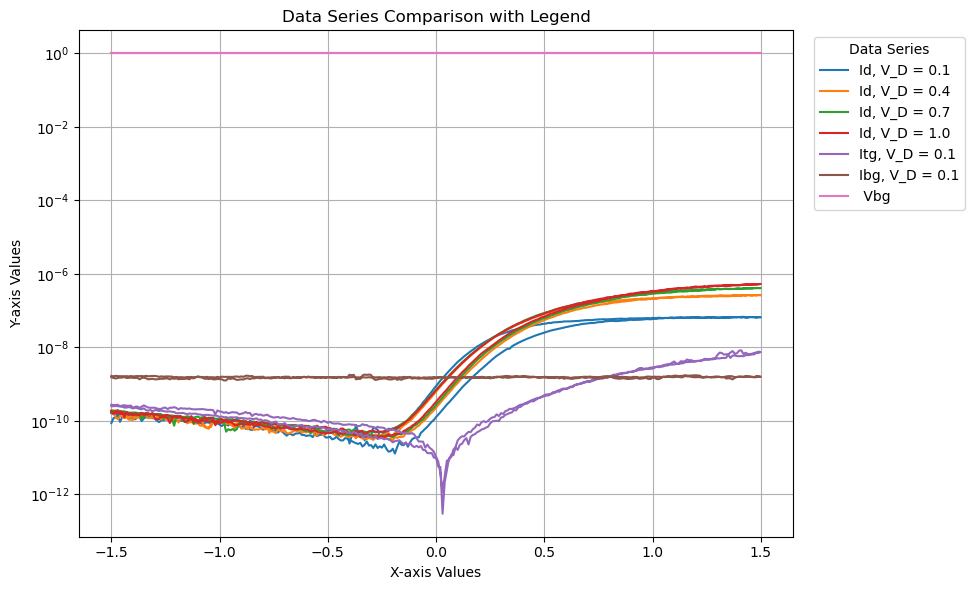

In [29]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [34]:
filtered_df = df_new[df_new['Id, V_D = 0.1'] > 1e-10]
print(filtered_df)

       Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                
-1.50   1.629700e-10   1.852800e-10   1.669500e-10   1.745900e-10   
-1.49   1.545200e-10   1.941500e-10   1.668000e-10   1.696600e-10   
-1.48   1.592600e-10   1.797900e-10   1.652700e-10   1.666700e-10   
-1.47   1.396300e-10   1.755300e-10   1.602700e-10   1.615400e-10   
-1.46   1.536700e-10   1.669700e-10   1.862700e-10   1.553600e-10   
...              ...            ...            ...            ...   
-1.44   1.296600e-10   1.188000e-10   1.790900e-10   1.262600e-10   
-1.45   1.284400e-10   1.341400e-10   1.719300e-10   1.788100e-10   
-1.47   1.364800e-10   1.123600e-10   1.988500e-10   1.756300e-10   
-1.48   1.251600e-10   1.244100e-10   1.845900e-10   1.920900e-10   
-1.49   1.200700e-10   1.603700e-10   1.888700e-10   1.548900e-10   

       Itg, V_D = 0.1  Ibg, V_D = 0.1   Vbg  
 VTG                                         
-1.50    2

In [75]:
filtered_df = df_new.iloc[140:462]
filtered_df

,"Id, V_D = 0.1","Id, V_D = 0.4","Id, V_D = 0.7","Id, V_D = 1.0","Itg, V_D = 0.1","Ibg, V_D = 0.1",Vbg
VTG,,,,,,,
-0.10,2.423000e-11,5.205000e-11,7.957000e-11,9.223000e-11,3.008000e-11,-3.520000e-12,1
-0.09,2.226000e-11,5.186000e-11,8.159000e-11,9.944000e-11,2.473000e-11,-4.030000e-12,1
-0.08,2.297000e-11,6.239000e-11,9.170000e-11,1.057100e-10,2.501000e-11,1.389000e-11,1
-0.07,2.235000e-11,7.079000e-11,1.012300e-10,1.073600e-10,2.001000e-11,-1.944000e-11,1
-0.06,2.046000e-11,6.785000e-11,9.622000e-11,1.235100e-10,1.375000e-11,1.526000e-11,1
...,...,...,...,...,...,...,...
-0.06,7.967000e-11,1.082500e-10,1.160000e-10,1.078300e-10,1.858000e-11,-9.680000e-12,1
-0.07,6.538000e-11,9.482000e-11,1.028000e-10,1.004000e-10,1.666000e-11,1.000000e-12,1
-0.08,5.761000e-11,8.202000e-11,8.908000e-11,8.634000e-11,2.017000e-11,6.770000e-12,1


In [36]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 0.1'].to_numpy()


In [24]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [37]:
sigma = 0.5 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


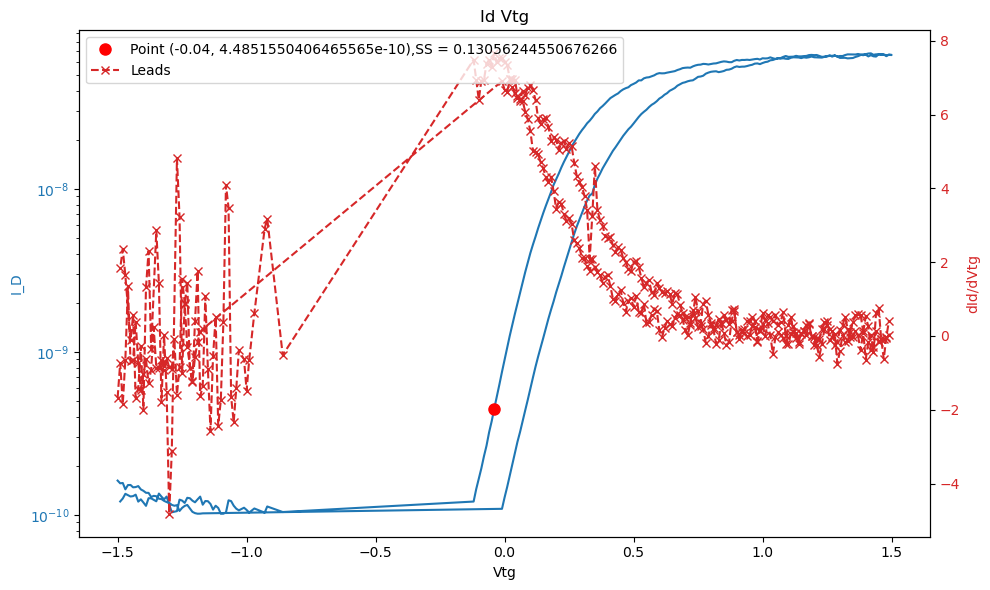

In [38]:
dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
max_index = np.nanargmax(dIdVg)



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/max(dIdVg)}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [89]:
Id_0p1 = filtered_df['Id, V_D = 0.1'].to_numpy()
Id_0p4 = filtered_df['Id, V_D = 0.4'].to_numpy()
Id_0p7 = filtered_df['Id, V_D = 0.7'].to_numpy()
Id_1p0 = filtered_df['Id, V_D = 1.0'].to_numpy()

sigma = 0.1 # Standard deviation of the Gaussian kernel
SS_4 = []
for Id in [Id_0p1,Id_0p4,Id_0p7,Id_1p0]:
    smoothed_Id = gaussian_filter1d(Id, sigma)
    dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
    max_index = np.nanargmax(dIdVg)
    SS = 1/max(dIdVg)
    Vtg_ss = Vtg[np.nanargmax(dIdVg)]
    SS_4.append(float(SS))

print(SS_4)

[0.11788284667850893, 0.12955984052720776, 0.14061435218114643, 0.13416355586364911]


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


In [37]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [3]:
# For SS calculation & saving files 


name_list = []
SS_0p1 = []
SS_0p4 = []
SS_0p7 = []
SS_1p0 = []


for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    
    print(f'SS: {result} started')
    name_list.append(result)
    try:
        Vbg,df = mo.read_csv_IdVtg_10mV(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

    df_filtered = fs.filter_noise(df_sorted)
    SS_4,Vtg_ss = fs.find_SS_grad_4(df_filtered)
    print(SS_4)
    SS_0p1.append(SS_4[0])
    SS_0p4.append(SS_4[1])
    SS_0p7.append(SS_4[2])
    SS_1p0.append(SS_4[3])

    


SS: R7C5B__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.09330379981736975, 0.13279788445261148, 0.14466717174848043, 0.1389950406316624]
SS: R7C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.09975649120826945, 0.12080411996490667, 0.12575385270490005, 0.12197091152162112]
SS: R8C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.08897724780374801, 0.12756082404519242, 0.1004066851660726, 0.13330634604004227]
SS: SS_per_file_diff_vds.csv started
File not processed


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by z

In [4]:
SS_df = pd.DataFrame(list(zip(name_list,SS_0p1,SS_0p4,SS_0p7,SS_1p0)), columns=['filename', 'SS, Vds=0.1','SS, Vds=0.4','SS, Vds=0.7','SS, Vds=1.0'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_diff_vds.csv", index=False)